In [9]:
#drawback of train test split
#testing accuracy change a lot depending upon which subset of data is in  training dataset
from sklearn.datasets import load_iris
data=load_iris()
X=data.data
y=data.target


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


In [11]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [12]:
#changing random state to 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=3)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


In [13]:
#changing random state to 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=2)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [14]:
#that's why testing accuracy is high variance estimate 
#here comes cross validation- creating various subsets of train and test datasets and then taking average
# KCross vaalidation 
#k partitions of equal size
#partitions aka "Folds"
#initially, fold 1 will be testing set , fold2- fold 5 will be training datset
#similarly there will be 5 iterations
#avg=crossvalidated accuracy
#NOte: we are dividing observations into 5 folds not the features or columns 
#

In [15]:
#when using cross validation for CLASSIFICATION problems; use stratified sampling
#scikit use stratified sampling by defaault


In [16]:
#Implemenntation of cross validation 
#goal= testing accuracy
#      select best tuning or HYPER parameters for knn which best generalize the output of sample data


#this k of knn is different from k cross validation


In [17]:
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn, X, y,cv=10, scoring='accuracy' )
#not putting x_train , y_train paramenters instead whole datset since cross validation takes care of
#splitting the dat into testing and training
#cv=10- using 10 fold cross validation
#scoring= "accuracy" we need classification accuracy as evaluation meteric
#cross val does the preocess of 10 fold cross validaton
#And return 10 accuracy scores as a numpy array
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
print(scores.mean())

0.9666666666666668


In [19]:
#goal: get optimized value for knn
#each value use 10 fold cross validation
#assuming fok =1 to 30
k_range=range(1,31)
means=[]
from sklearn.neighbors import KNeighborsClassifier
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    from sklearn.cross_validation import cross_val_score
    scores=cross_val_score(knn, X, y, cv=10, scoring="accuracy") #if i put means[]  here then??
    mean=scores.mean()
    means.append(mean)
print(means)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Accuracy levels')

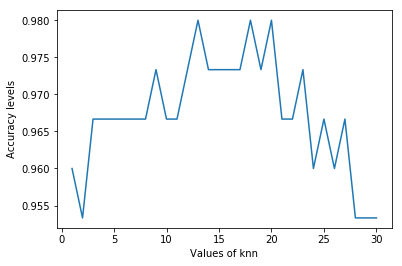

In [20]:
#hard to visulaize number use matplotlib - to visualize how accuracy changes as we vary the k-knn wala
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(k_range,means)
plt.xlabel("Values of knn")
plt.ylabel("Accuracy levels")

In [21]:
#will take k=20; since taking higher taking k reduces complexity and aintains variance

from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=20)
scores=cross_val_score(knn, X, y,cv=10, scoring='accuracy' ).mean()
#comparing with logistic
scores

0.9800000000000001

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
score_2=cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
score_2

0.9533333333333334

In [23]:
#so proves knn is better model for this task


In [31]:
#cross validation help in linear regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
feature_cols=['TV', 'radio','newspaper']
X=data[feature_cols]
y=data.sales

In [39]:
linreg=LinearRegression()
#here evaluation metrics is not accuracy rather rmse
#so, 
scores=cross_val_score(linreg, X,y, cv=10, scoring='neg_mean_squared_error' )
print(scores)
#negattive results
#what is going on?
#classification- something you want to maximize- reward function


#and regression-something to minimize-loss function'

#create model with reward function is best model while with loss funtion is worst model 
 

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [42]:
mse=-(scores)
mse


array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [46]:
rmse=np.sqrt(mse)
rmse
rmse.mean()

1.6913531708051797

In [50]:
feature_cols=['TV','radio']
X=data[feature_cols]
print(np.sqrt(-(cross_val_score(linreg,X,y, cv=10,scoring="mean_squared_error"))).mean())

1.6796748419090768


C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Ankit Bhatia\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U